#LeNet5 Network
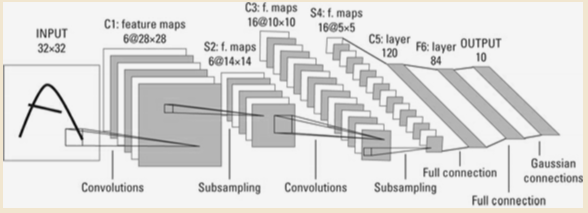


In [80]:
# Initialization
import keras 
import numpy as np 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Conv2D, AveragePooling2D 
from keras.layers import Dense, Flatten 
from keras.losses import categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy
from matplotlib import pyplot as plt
np.random.seed(123)

In [81]:
# Testing if GPU exists
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4238437753898562451
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16979974554889700366
physical_device_desc: "device: XLA_CPU device"
]


[]

In [82]:
# data is loaded into ~/.keras/datasets
# data consists of single channel 28x28 pixel images of handwritten numbers

(X_train, y_train_lab), (X_test, y_test_lab) = mnist.load_data()

Validating data -------------- section

In [83]:
print("size", X_train[0].size)
print("shape", X_train[0].shape) # print(X_train[0]) # print 28 x 28 array
print("X_train type", type(X_train))
print("y_train type", type(y_train_lab))

size 784
shape (28, 28)
X_train type <class 'numpy.ndarray'>
y_train type <class 'numpy.ndarray'>


In [84]:
print("y_train_lab", y_train_lab[5])
k_category = keras.utils.to_categorical(y_train_lab, 10)  # just checking that it converts a number label to binary matrix
print("k_category", k_category[5])
print("k_category type",type(k_category))

y_train_lab 2
k_category [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
k_category type <class 'numpy.ndarray'>


In [85]:
# loop over each label in sequence
num_classes = len(np.unique(y_train_lab))
print("num of classes", num_classes)
print("count of numbers", len(X_train))
for i in range(0,num_classes):
    X_train_by_nums = X_train[y_train_lab == i]
    print("class = ",i," count = ",(len(X_train_by_nums)))

num of classes 10
count of numbers 60000
class =  0  count =  5923
class =  1  count =  6742
class =  2  count =  5958
class =  3  count =  6131
class =  4  count =  5842
class =  5  count =  5421
class =  6  count =  5918
class =  7  count =  6265
class =  8  count =  5851
class =  9  count =  5949


5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
60000
10000


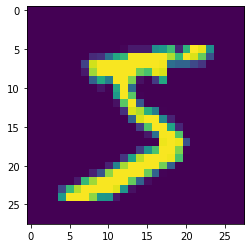

In [86]:

print(y_train_lab[0], end=' => ') 

y_train = keras.utils.to_categorical(y_train_lab, 10) 
y_test = keras.utils.to_categorical(y_test_lab, 10) 
plt.imshow(X_train[0])
print(y_train[0])
print(len(y_train))
print(len(y_test))


In [87]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


End data Validation -------------------------------------

In this case, you see ten neurons, and in the training phase, the code activates the correct answer (the value at the correct position is set to 1) and turns the others off (their values are 0). In the test phase, the neural network uses its database of examples to turn the correct neuron on, or at least turn on more than the correct one.


In [88]:
X_train = X_train.astype(np.float32) / 255 
X_test = X_test.astype(np.float32) / 255 
img_rows, img_cols = X_train.shape[1:] 
X_train = X_train.reshape(len(X_train), img_rows, img_cols, 1) 
X_test = X_test.reshape(len(X_test), img_rows, img_cols, 1) 
input_img_shape = (img_rows, img_cols, 1)


In [89]:
print((img_rows))
print(img_cols)
print(len(X_train))
print(len(X_test))

28
28
60000
10000


The pixel numbers, which range from 0 to 255, are transformed into a decimal value ranging from 0 to 1. The first two lines of code optimize the network to work properly with large numbers that could cause problems. The lines that follow reshape the images to have height, width, and channels.


In [90]:
lenet = Sequential()
print(input_img_shape)

(28, 28, 1)


The following line of code defines the LeNet5 architecture. You start by calling the sequential function that provides an empty model:

In [91]:
lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_img_shape, name='C1'))
# input_shape=input_shape, padding='same', name='C1'))
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


The first layer added is a convolutional layer, named “C1”: The convolution operates with a filter size of 6 (meaning that it will create six new channels made by convolutions) and a kernel size of 5 x 5 pixels.

See how to replace Tanh with ReLU; To use such a network for your own projects, you should replace it with a modern ReLU (see https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning for details).

In [92]:
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), 
                           padding='valid'))
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


The example adds a pooling layer, named S2, which uses a 2-x-2-pixel kernel

At this point, the code proceeds with the sequence, always performed with a convolution and a pooling layer but this time using more filters:

In [93]:
lenet.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), 
                 activation='relu', padding='valid'))
lenet.summary()
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), 
                           padding='valid'))
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 16)        2416      
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
__________________________________

The LeNet5 closes incrementally using a convolution with 120 filters. This convolution doesn't have a pooling layer but rather a flattening layer, which projects the neurons into the last convolution layer as a dense layer:


In [94]:
lenet.add(Conv2D(120, kernel_size=(5, 5), activation='tanh', name='C5'))
lenet.add(Flatten())

lenet.add(Dense(84, activation='relu', name='FC6'))
lenet.summary()
lenet.add(Dense(10, activation='softmax', name='OUTPUT'))
lenet.summary()
# https://stackoverflow.com/questions/43034960/many-to-one-and-many-to-many-lstm-examples-in-keras/43047615#43047615


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 18, 18, 16)        0         
_________________________________________________________________
C5 (Conv2D)                  (None, 14, 14, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 23520)             0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)                1

The closing of the network is a sequence of two dense layers that process the convolution’s outputs using the tanh and softmax activation. These two layers provide the final output layers where the neurons activate an output to signal the predicted answer. The softmax layer is actually the output layer as specified by name='OUTPUT'

In [95]:
lenet.compile(loss=categorical_crossentropy, optimizer='adam', 
              metrics=['accuracy']) 
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 18, 18, 16)        0         
_________________________________________________________________
C5 (Conv2D)                  (None, 14, 14, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 23520)             0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)                1

When the network is ready, you need Keras to compile it. (Behind all the Python code is some C language code.) Keras compiles it based on the SGD optimizer:

In [101]:
# Testing NN is forgetting trained classes

batch_size = 64
epochs_size = 2

for i in range(0,num_classes):
    y_train_by_class = y_train[y_train_lab == i]
    X_train_by_class = X_train[y_train_lab == i]
    print("class = ",i," count = ",(len(X_train_by_nums)))
    lenet.fit(X_train_by_class, y_train_by_class, batch_size=batch_size, epochs=epochs_size)
    
    # Evaluate classes trained with the fitted model "inclusive" from 0 to i 
    for j in range(0, i + 1):
        y_train2_by_class = y_train[y_train_lab <= j]
        X_train2_by_class = X_train[y_train_lab <= j]
        print("class 2 = ",j," count = ",(len(X_train2_by_class)))
        loss, acc = lenet.evaluate(X_train2_by_class, y_train2_by_class, verbose=2)
        print('model, accuracy: {:5.2f}%'.format(100*acc))
        print(lenet.predict(X_train2_by_class).shape)
                    
                    #validation_data=(X_test, y_test))

class =  0  count =  5949
93/93 [==============================] - 9s 96ms/step - loss: 1.7324 - accuracy: 0.2544
class 2 =  0  count =  5923
186/186 - 2s - loss: 1.6284 - accuracy: 1.0000
model, accuracy: 100.00%
(5923, 10)
class =  1  count =  5949
106/106 [==============================] - 10s 97ms/step - loss: 1.6020 - accuracy: 0.6013
class 2 =  0  count =  5923
186/186 - 2s - loss: 1.6547 - accuracy: 0.0000e+00
model, accuracy:  0.00%
(5923, 10)
class 2 =  1  count =  12665
396/396 - 5s - loss: 1.5704 - accuracy: 0.5323
model, accuracy: 53.23%
(12665, 10)
class =  2  count =  5949
94/94 [==============================] - 9s 95ms/step - loss: 1.7518 - accuracy: 0.0000e+00
class 2 =  0  count =  5923
186/186 - 2s - loss: 1.6956 - accuracy: 0.0000e+00
model, accuracy:  0.00%
(5923, 10)
class 2 =  1  count =  12665
396/396 - 5s - loss: 1.6016 - accuracy: 0.5323
model, accuracy: 53.23%
(12665, 10)
class 2 =  2  count =  18623
582/582 - 8s - loss: 1.6163 - accuracy: 0.3620
model, accur

KeyboardInterrupt: 

Completing the run takes N epochs, each epoch processing batches of 64 images at one time. (An epoch is the passing of the entire dataset through the neural network one time, while a batch is a part of the dataset, which means breaking the dataset into 64 chunks in this case.) With each epoch (lasting about 8 seconds if you use Colab), you can monitor a progress bar telling you the time required to complete that epoch. You can also read the accuracy measures for both the training set (the optimistic estimate of the goodness of your model, see https://towardsdatascience.com/measuring-model-goodness-part-1-a24ed4d62f71 for details on what precisely goodness means) and the test set (the more realistic view). At the last epoch, you should read that a LeNet5 built in a few steps achieves an accuracy of 0.989, meaning that out every 100 handwritten numbers that it tries to recognize, the network should guess about 99 correctly.


In [16]:
# !pip install pyyaml h5py  # Required to save models in HDF5 format

Defaulting to user installation because normal site-packages is not writeable


In [78]:
print(tf.version.VERSION)

2.3.0


In [18]:
#manually save weights
!mkdir -p checkpoint
lenet.save_weights('./checkpoint/mnist_100420')

In [19]:
!ls checkpoint

checkpoint  mnist_100420.data-00000-of-00001  mnist_100420.index


In [20]:
latest = tf.train.latest_checkpoint('./checkpoint')

In [21]:
latest

'./checkpoint/mnist_100420'

In [24]:
# save entire model
!mkdir -p save_model
lenet.save('save_model/mnist_100420_fitted_model.h5')

In [25]:
!ls save_model

mnist_100420_fitted_model.h5


In [79]:
# New Model
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [26]:
# load a new model using saved model
new_model = tf.keras.models.load_model('save_model/mnist_100420_fitted_model.h5')

In [27]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 18, 18, 16)        0         
_________________________________________________________________
C5 (Conv2D)                  (None, 14, 14, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 23520)             0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)                1

In [31]:
# Evaluate the restored model
loss, acc = new_model.evaluate(X_test,y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(X_test).shape)

313/313 - 4s - loss: 0.1893 - accuracy: 0.9866
Restored model, accuracy: 98.66%
(10000, 10)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]


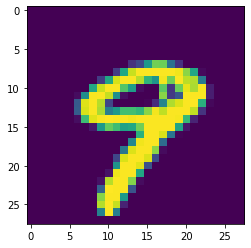

In [46]:
# Predict single image
val_img = 18

for i in range(1,10):
    img = X_test[i]
    plt.imshow(img)
    print(y_test[i])
    img = np.resize(img, (28,28,1))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    y_pred = new_model.predict_classes(im2arr)
    print(y_pred)